# 线性回归

- 在线性回归算法中，<br>

    > *hypothesis function* 定义为：
    
    $$h_\theta(x^i)=\theta_0+\theta_1x_1^i+\theta_2x_2^i+\theta_3x_3^i+...+\theta_jx_j^i+...+\theta_nx_n^i$$ 

将所有样本组合成矩阵形式：
    
$$H_{\Theta}(X)=X\Theta=
\begin{bmatrix}
1 & x^1_1 & \ldots &x^1_j & \ldots &x^1_n \\
1 & x^2_1 & \ldots &x^2_j & \ldots &x^2_n \\
          &&& \vdots                      \\
1 & x^i_1 & \ldots &x^i_j & \ldots &x^i_n \\
          &&& \vdots                      \\
1 & x^m_1 & \ldots &x^m_j & \ldots &x^m_n
\end{bmatrix}  
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_j \\
\vdots  \\
\theta_n \\
\end{bmatrix}$$
    
> *cost function* 定义为：    (Y即所谓的真实值） （可以理解为，关于θ的函数的根求解，对θ求导，因为变量是theta，x只是样本量，这是关于θ的函数）
    
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)^2$$ $$J(\Theta)=\frac{1}{2m}(X\Theta-Y)^T(X\Theta-Y)$$ <br>
（算平方误差是为了满足这个是凸函数 #<br_>表示HTML语言内的换行符(无下划线，下划线仅仅是为了能够显示出来而已)）
    
> 梯度下降算法:
    
$$\theta_j:=\theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)x_j^i \quad (\ for\ every\ j\ )$$ $$\Theta:=\Theta-\frac{\alpha}{m}X^T(X\Theta-Y)$$  



## 作业

拟合函数：

$$ sinc = \frac{\sin ax}{ax}$$
$a$ 是一个可变常数。在给定 $a$,确定一个最佳的特征数 $n$.

In [51]:
import numpy as np
import matplotlib # 注意这个也要import一次,原因不是很清楚
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 使用Matplotlib的字体管理器加载中文字体
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simsunb.ttf")
plt.rcParams['font.sans-serif']=['SimHei']

#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

from pylab import plot, xlabel, ylabel,legend
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。

### 1.1 生成训练集 Training set

In [52]:
def sinc(x,a): 
    return np.sin(a*x)/(a*x)
    #return sinc(a*x)

In [53]:
m=20 # 样本数
p = 2             #设置sinc函数的参数a
x = np.linspace(-10,10,m)
print(x)
x = x.reshape(m,1)    #改为M*1的矩阵（就是两个括号）
print(x)
Y = sinc(x,p)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
[[-10.        ]
 [ -8.94736842]
 [ -7.89473684]
 [ -6.84210526]
 [ -5.78947368]
 [ -4.73684211]
 [ -3.68421053]
 [ -2.63157895]
 [ -1.57894737]
 [ -0.52631579]
 [  0.52631579]
 [  1.57894737]
 [  2.63157895]
 [  3.68421053]
 [  4.73684211]
 [  5.78947368]
 [  6.84210526]
 [  7.89473684]
 [  8.94736842]
 [ 10.        ]]


通过printx可以查看到，reshape的功能，将一个列表，变成一个二维矩阵

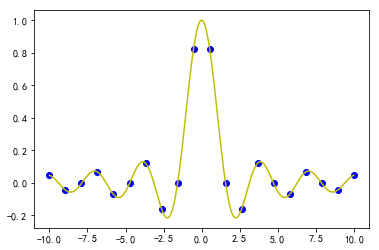

In [54]:
x1=np.linspace(-10,10,400)
y1=sinc(x1,p)
plot(x,Y,'bo',x1,y1,'y-');

这里也可以明白plot是支持列表同时也是支持向量的，不用将两列拼在一起成为点的形式

### 1.2 Feature Mapping

|$1$|$x_1$|$x_2$|$x_3$|$\ldots$|$x_n$|
|---|-----|------|----|--------|-----|
|$1$|$x^1$|$x^2$|$x^3$|$\ldots$|$x^n$|

在这里，进行了升维操作，特征数为n+1

In [55]:
def FeatureMapping(X,n): 
    """
    定义幂函数特征项
    X--训练集的 x 值
    n-- 表示最高阶幂次
    输出：(m,n+1)的 np.array
    """
    XX=np.insert(X,0,values=1,axis=1)     #insert 将矩阵从第0列的前面插个1，values表示插入数值，axis 0 表示插一横（n*1 → (n+1)*1, 1表示（2*n)
    g = X
    for i in range(n-1):
        g=g*X                             #为了得到x^2,x^3……
        XX = np.column_stack((XX,g))      #再后面插个g
    return XX

n=20

X = FeatureMapping(x,n)           #得到数据的Feature mapping, 还没有乘以系数theta
print(X)

Theta=np.random.rand(n+1).reshape(n+1,1) # shape (n+1,1)， 注意是n+1 这么多个

[[ 1.00000000e+00 -1.00000000e+01  1.00000000e+02 -1.00000000e+03
   1.00000000e+04 -1.00000000e+05  1.00000000e+06 -1.00000000e+07
   1.00000000e+08 -1.00000000e+09  1.00000000e+10 -1.00000000e+11
   1.00000000e+12 -1.00000000e+13  1.00000000e+14 -1.00000000e+15
   1.00000000e+16 -1.00000000e+17  1.00000000e+18 -1.00000000e+19
   1.00000000e+20]
 [ 1.00000000e+00 -8.94736842e+00  8.00554017e+01 -7.16285173e+02
   6.40886734e+03 -5.73424972e+04  5.13064449e+05 -4.59057665e+06
   4.10735805e+07 -3.67500457e+08  3.28816199e+09 -2.94203967e+10
   2.63235129e+11 -2.35526168e+12  2.10733939e+13 -1.88551420e+14
   1.68703902e+15 -1.50945596e+16  1.35056586e+17 -1.20840103e+18
   1.08120092e+19]
 [ 1.00000000e+00 -7.89473684e+00  6.23268698e+01 -4.92054235e+02
   3.88463870e+03 -3.06682003e+04  2.42117370e+05 -1.91145292e+06
   1.50904178e+07 -1.19134878e+08  9.40538507e+08 -7.42530400e+09
   5.86208211e+10 -4.62795956e+11  3.65365228e+12 -2.88446233e+13
   2.27720710e+14 -1.79779508e+15  1.4

\begin{bmatrix}
1 & x^1_1 & \ldots &x^1_j & \ldots &x^1_n \\
1 & x^2_1 & \ldots &x^2_j & \ldots &x^2_n \\
          &&& \vdots                      \\
1 & x^i_1 & \ldots &x^i_j & \ldots &x^i_n \\
          &&& \vdots                      \\
1 & x^m_1 & \ldots &x^m_j & \ldots &x^m_n
\end{bmatrix}  

生成结果就是代入了数值的上面矩阵

### 1.3 Normal Equation

我们需要寻找合适的 $\theta_j$ 使 $$\frac{dJ(\Theta)}{d \theta_j}= \sum_{i=1}^{m}(h_\theta(x^i)-y^i)x_j^i = 0 \quad (\ for\ every\ j\ )$$

把上述等式写成矩阵形式：$$\frac{1}{m}X^T(X \Theta - Y) = 0 $$

很容易得到解：

$$\Theta = ((X^TX))^{-1}X^TY$$

因此得到了求解θ的解析解

In [56]:
def NormalEquation(X,Y):
    """
    线性模型的 Normal Equation    
    """
    C=np.dot(X.T,X)    #矩阵乘法
    B=np.linalg.inv(C)    #求个逆
    D=np.dot(B,X.T)    #矩阵乘法
    return np.dot(D,Y)      #输出上式Θ

Theta_prediction=NormalEquation(X,Y)

利用算法求得Y_prediction & cost function：

$$Y_{prediction}=X\Theta=
\begin{bmatrix}
1 & x^1_1 & \ldots &x^1_j & \ldots &x^1_n \\
1 & x^2_1 & \ldots &x^2_j & \ldots &x^2_n \\
          &&& \vdots                      \\
1 & x^i_1 & \ldots &x^i_j & \ldots &x^i_n \\
          &&& \vdots                      \\
1 & x^m_1 & \ldots &x^m_j & \ldots &x^m_n
\end{bmatrix}  
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_j \\
\vdots  \\
\theta_n \\
\end{bmatrix}$$

cost function:

$$J(\Theta)=\frac{1}{2m}(X\Theta-Y)^T(X\Theta-Y)$$ <br>


In [57]:
Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
J = np.dot((np.dot(X,Theta_prediction)-Y).T,np.dot(X,Theta_prediction)-Y)/2/m       #算平方误差

loss function: 0.006734858259367335


Text(0, 0.5, '函数值')

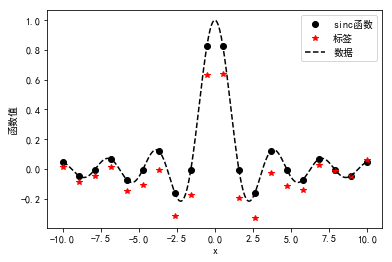

In [58]:
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
fig1, = plot(x,Y,'ko');             #加逗号是为了输出图例
fig2, = plot(x,Y_prediction,'r*');
fig3, = plot(x1,y1,"k--");
legend(handles=[fig1, fig2, fig3], labels=['sinc函数', '标签','数据'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

探索最高次幂与误差的关系

Text(0, 0.5, '误差值')

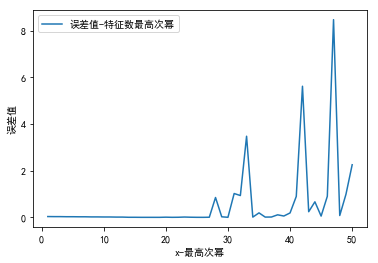

In [59]:
n = []
for k in range(50):
    n.append(k+1)
Error = []
j = 0
for i in range(50):
    X = FeatureMapping(x,n[j])           #得到数据的Feature mapping, 还没有乘以系数theta
    Theta=np.random.rand(n[j]+1).reshape(n[j]+1,1) # shape (n+1,1)， 注意是n+1 这么多个
    Theta_prediction=NormalEquation(X,Y)
    Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
    J = np.dot((np.dot(X,Theta_prediction)-Y).T,np.dot(X,Theta_prediction)-Y)/2/m       #算平方误差
    Error.append(J.item())
    j+= 1
fig4, = plot(n,Error);             #加逗号是为了输出图例
legend(handles=[fig4], labels=['误差值-特征数最高次幂'])           #输出图例
xlabel("x-最高次幂")
ylabel("误差值")

可以看到大约大于27的时候，误差大幅度增加，由于数量级差异过大，看不清前面的最优次幂为何处，所以现在调小n：

Text(0, 0.5, '误差值')

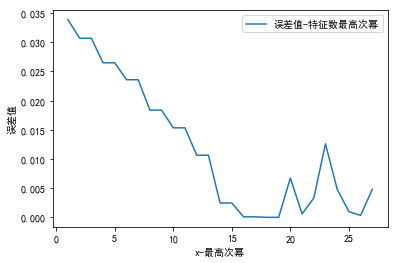

In [60]:
n = []
for k in range(27):
    n.append(k+1)
Error = []
j = 0
for i in range(27):
    X = FeatureMapping(x,n[j])           #得到数据的Feature mapping, 还没有乘以系数theta
    Theta=np.random.rand(n[j]+1).reshape(n[j]+1,1) # shape (n+1,1)， 注意是n+1 这么多个
    Theta_prediction=NormalEquation(X,Y)
    Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
    J = np.dot((np.dot(X,Theta_prediction)-Y).T,np.dot(X,Theta_prediction)-Y)/2/m       #算平方误差
    Error.append(J.item())
    j+= 1
fig4, = plot(n,Error);             #加逗号是为了输出图例
legend(handles=[fig4], labels=['误差值-特征数最高次幂'])           #输出图例
xlabel("x-最高次幂")
ylabel("误差值")

继续缩小范围到[16,19]

Text(0, 0.5, '误差值')

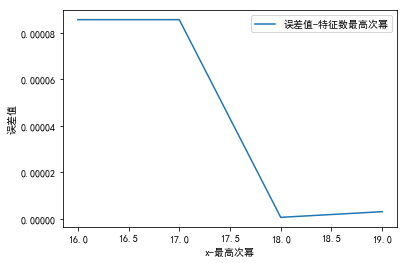

In [61]:
n = []
for k in range(4):
    n.append(k+16)
Error = []
j = 0
for i in range(4):
    X = FeatureMapping(x,n[j])           #得到数据的Feature mapping, 还没有乘以系数theta
    Theta=np.random.rand(n[j]+1).reshape(n[j]+1,1) # shape (n+1,1)， 注意是n+1 这么多个
    Theta_prediction=NormalEquation(X,Y)
    Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
    J = np.dot((np.dot(X,Theta_prediction)-Y).T,np.dot(X,Theta_prediction)-Y)/2/m       #算平方误差
    Error.append(J.item())
    j+= 1
fig4, = plot(n,Error);             #加逗号是为了输出图例
legend(handles=[fig4], labels=['误差值-特征数最高次幂'])           #输出图例
xlabel("x-最高次幂")
ylabel("误差值")

得到18的时候误差值最小，再次拟合画图

loss function: 5.482697339432804e-07


Text(0, 0.5, '函数值')

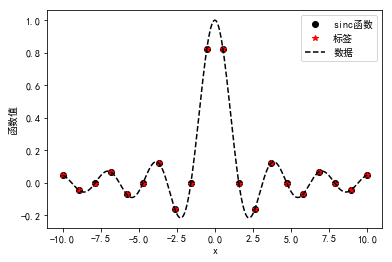

In [62]:
n = 18
X = FeatureMapping(x,n)           #得到数据的Feature mapping, 还没有乘以系数theta
Theta=np.random.rand(n+1).reshape(n+1,1) # shape (n+1,1)， 注意是n+1 这么多个
Theta_prediction=NormalEquation(X,Y)    #计算拟合的Θ
Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
J = np.dot((np.dot(X,Theta_prediction)-Y).T,np.dot(X,Theta_prediction)-Y)/2/m       #算平方误差
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
fig1, = plot(x,Y,'ko');             #加逗号是为了输出图例
fig2, = plot(x,Y_prediction,'r*');
fig3, = plot(x1,y1,"k--");
legend(handles=[fig1, fig2, fig3], labels=['sinc函数', '标签','数据'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

现在，预测值效果非常好（显然过拟合，不过这个现在不讨论）

### 1.4 Batch 梯度下降 Gradient Descent

batch(随机挑一个样本算梯度）,现在用的是所有的θ，所以是梯度下降

 $$\Theta:=\Theta-\frac{\alpha}{m}X^T(X\Theta-Y)$$  
 
 cost function:$$J(\Theta)=\frac{1}{2m}(X\Theta-Y)^T(X\Theta-Y)$$

In [130]:
alpha=0.0000001 # 学习率
n=2
X = FeatureMapping(x,n)           #得到数据的Feature mapping, 还没有乘以系数theta
Theta=np.random.rand(n+1).reshape(n+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
iter_number = 1000000                       #设置迭代次数
#J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
J = np.empty(iter_number)   #产生空的列向量(1维列表)
ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
for i in np.arange(iter_number):    
    Theta = Theta - alpha*np.dot(X.T,(np.dot(X,Theta)-Y))/m               #见上公式
    J[i] = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m            #得到纵坐标误差J的纵坐标
    ii[i]=i                 #产生画图的横坐标-迭代次数


Text(0, 0.5, 'loss-function')

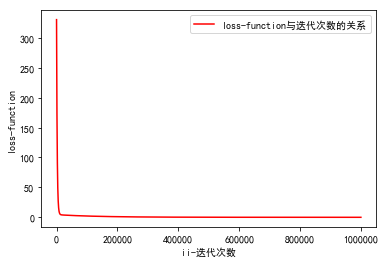

In [131]:
fig5, = plot(ii,J,"r-")
legend(handles=[fig5], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("ii-迭代次数")
ylabel("loss-function")

In [132]:
Y_prediction_2=np.dot(X,Theta)

loss funciton: 0.04853909594233384


Text(0, 0.5, '函数值')

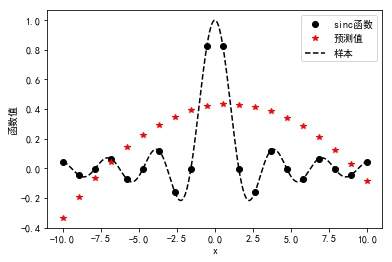

In [133]:
print("loss funciton:",J[-1])
fig6, = plot(x,Y,'ko');
fig7, = plot(x,Y_prediction_2,'r*')
fig8, = plot(x1,y1,"k--")
legend(handles=[fig6,fig7,fig8], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

In [134]:
x_test = np.linspace(-10,10,100).reshape(100,1)    #为了画出标签的函数图得到横坐标
X_test = FeatureMapping(x_test,n)                 #求得Feature Mapping的结果，即讲每个x代入函数次幂求和
Y_test = np.dot(X_test,Theta)                    #求得标签，准备画图

Text(0, 0.5, '函数值')

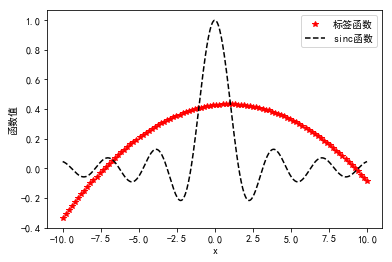

In [135]:
fig9, = plot(x_test,Y_test,'r*');             #逗号很重要，不然图例跑不出来
fig10, = plot(x1,y1,"k--")
legend(handles=[fig9,fig10], labels=['标签函数','sinc函数'])            #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

关于Gradient的总结：

通过多次调试参数α（学习率），迭代次数ii，最大幂次n

n: 发现n>4的情况迭代无法收敛，逐渐增高不可取

迭代次数ii: 若以次为变量，则循环次数过多，电脑计算能力应付不过来，所以选取了一个运行时间相对能够接受的数值

学习率α：学习率太大无法收敛，以每次以数量级同量级的数值作测试得出0.0000001最为合适，0.0000002无法收敛，0.00000001不如前者。

但也出现了一个有趣的现象，就是没计算一次，误差都不一样，想了想是因为特征值是随机选取的，而本来误差就比较大，所以在这个时候初值的选取的影响度也就相对较大。

#### 1.4.1 牛顿法

牛顿法根据之前定义即将α换成cost function的二阶导数分之一

根据查询可以得到矩阵形式: （[Ref](https://www.cnblogs.com/f-young/p/8100127.html))

$$\Theta:=\Theta-\frac{1}{m}(X^TWX)^{-1}X^T(X\Theta-Y)$$其中$W$为：W是一个n×n对角矩阵，第i个元素取值为:
$$(X_{i}\Theta)(1-X_i\Theta)$$ 
其中$X_i$表示第i个数据的Feature Mapping




In [200]:
n=2
X = FeatureMapping(x,n)           #得到数据的Feature mapping, 还没有乘以系数theta
Theta=np.random.rand(n+1).reshape(n+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
iter_number = 5200                       #设置迭代次数
#J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
J = np.empty(iter_number)   #产生空的列向量(1维列表)
iii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
for i in np.arange(iter_number):
    W = np.zeros(shape=(20,20))             #二维矩阵大小与数据数量一致,因为之前提取了20个
    for j in range(20):                    #计算W
        Xi = X[j,:]                        #提取单个数据的mapping
        W[j][j] = np.dot(np.dot(Xi,Theta),(1-np.dot(Xi,Theta)))
    A0 = np.dot(np.dot(X.T,W),X)             #计算求得X_TWX
    A = np.linalg.inv(A0)                           #将A取逆
    Theta = Theta + np.dot(A,np.dot(X.T,(np.dot(X,Theta)-Y)))/m               #见上公式
    J[i] = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m            #得到纵坐标误差J的纵坐标
    iii[i]=i                 #产生画图的横坐标-迭代次数


Text(0, 0.5, 'loss-function')

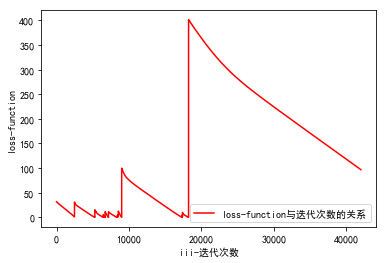

In [167]:
fig11, = plot(iii,J,"r-")
legend(handles=[fig11], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("iii-迭代次数")
ylabel("loss-function")

Text(0, 0.5, 'loss-function')

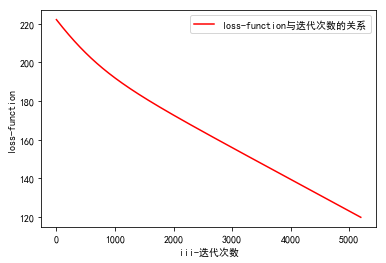

In [183]:
# 迭代次数=5200
fig11, = plot(iii,J,"r-")
legend(handles=[fig11], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("iii-迭代次数")
ylabel("loss-function")

loss funciton: 119.76465879688706


Text(0, 0.5, '函数值')

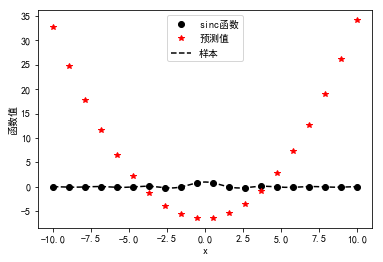

In [184]:
Y_prediction_3=np.dot(X,Theta)
print("loss funciton:",J[-1])
fig6, = plot(x,Y,'ko');
fig12, = plot(x,Y_prediction_3,'r*')
fig8, = plot(x1,y1,"k--")
legend(handles=[fig6,fig7,fig8], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

### 1.4.1 Batch 梯度下降(根据定义尝试）

根据定义，随机选取一个样本算梯度，不断优化系数θ

In [215]:
alpha=0.0000001 # 学习率
n=2
X = FeatureMapping(x,n)           #得到数据的Feature mapping, 还没有乘以系数theta
Theta=np.random.rand(n+1).reshape(n+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
iter_number = 1000000                       #设置迭代次数
#J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
J = np.empty(iter_number)   #产生空的列向量(1维列表)
ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
for i in np.arange(iter_number):
    #随机提取：从X里随机选取一个数据的map        
    row_rand_array = np.arange(X.shape[0])                #得到行数并将行数变成一列表的形式，和rang(行数)一致
    np.random.shuffle(row_rand_array)                #打乱上个列表
    Xi = X[row_rand_array[0:1]]            #选择上个列表的第一个，因为上个列表在不断的打乱，所以是随机                                                              
    #提取完毕
    Theta = Theta - alpha*np.dot(Xi.T,(np.dot(Xi,Theta)-Y[row_rand_array[0:1]]))/m               #见上公式
    J[i] = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m            #得到纵坐标误差J的纵坐标
    ii[i]=i                 #产生画图的横坐标-迭代次数


Text(0, 0.5, 'loss-function')

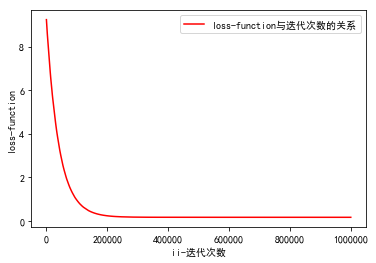

In [216]:
fig13, = plot(ii,J,"r-")
legend(handles=[fig13], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("ii-迭代次数")
ylabel("loss-function")

In [198]:
Y_prediction_4=np.dot(X,Theta)

[[ 145  451  757 1063]]


loss funciton: 0.14910767074678608


Text(0, 0.5, '函数值')

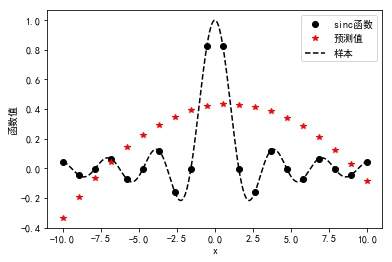

In [217]:
print("loss funciton:",J[-1])
fig6, = plot(x,Y,'ko');
fig14, = plot(x,Y_prediction_2,'r*')
fig8, = plot(x1,y1,"k--")
legend(handles=[fig6,fig14,fig8], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

### 1.4.2 mini-Batch 梯度下降(根据定义尝试)

mini-batch(算两三个样本，再随机选取一个样本算梯度)。

In [220]:
X = FeatureMapping(x,n)           #得到数据的Feature mapping, 还没有乘以系数theta
#随机提取：从X里随机选取二三个数据的map        
row_rand_array = np.arange(X.shape[0])                #得到行数并将行数变成一列表的形式，和rang(行数)一致
np.random.shuffle(row_rand_array)                #打乱上个列表
X2 = X[row_rand_array[0:2]]            #选择上个列表的前两个，因为上个列表在不断的打乱，所以是随机                                                              
#提取完毕
alpha=0.0000001 # 学习率
n=2
Theta=np.random.rand(n+1).reshape(n+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
iter_number = 1000000                       #设置迭代次数
#J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
J = np.empty(iter_number)   #产生空的列向量(1维列表)
ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
for i in np.arange(iter_number):
    #随机提取：从X里随机选取一个数据的map        
    row_rand_array = np.arange(X2.shape[0])                #得到行数并将行数变成一列表的形式，和rang(行数)一致
    np.random.shuffle(row_rand_array)                #打乱上个列表
    Xi = X2[row_rand_array[0:1]]            #选择上个列表的第一个，因为上个列表在不断的打乱，所以是随机                                                              
    #提取完毕
    Theta = Theta - alpha*np.dot(Xi.T,(np.dot(Xi,Theta)-Y[row_rand_array[0:1]]))/m               #见上公式
    J[i] = np.dot((np.dot(X2,Theta)-Y[row_rand_array[0:2]]).T,np.dot(X2,Theta)-Y[row_rand_array[0:2]])/2/m            #得到纵坐标误差J的纵坐标
    ii[i]=i                 #产生画图的横坐标-迭代次数


Text(0, 0.5, 'loss-function')

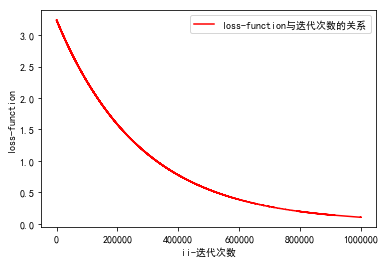

In [221]:
fig15, = plot(ii,J,"r-")
legend(handles=[fig15], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("ii-迭代次数")
ylabel("loss-function")

In [222]:
Y_prediction_5=np.dot(X,Theta)

loss funciton: 0.10083679591371608


Text(0, 0.5, '函数值')

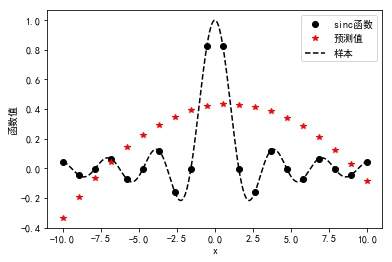

In [223]:
print("loss funciton:",J[-1])
fig6, = plot(x,Y,'ko');
fig16, = plot(x,Y_prediction_2,'r*')
fig8, = plot(x1,y1,"k--")
legend(handles=[fig6,fig16,fig8], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")